<a href="https://colab.research.google.com/github/kdemertzis/LNexamples/blob/main/FMDM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4fcea74153bce22a1f757071acbfa89591eb80e0fd01e2a4669a42ce0f91502e
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


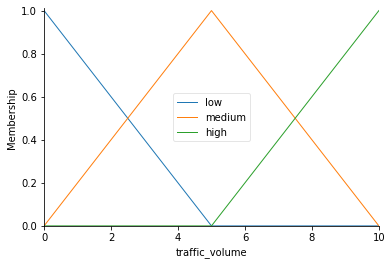

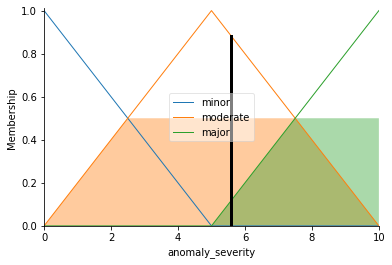

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy system variables
traffic_volume = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic_volume')
anomaly_severity = ctrl.Consequent(np.arange(0, 11, 1), 'anomaly_severity')

# Define the membership functions for traffic_volume
traffic_volume['low'] = fuzz.trimf(traffic_volume.universe, [0, 0, 5])
traffic_volume['medium'] = fuzz.trimf(traffic_volume.universe, [0, 5, 10])
traffic_volume['high'] = fuzz.trimf(traffic_volume.universe, [5, 10, 10])

# Define the membership functions for anomaly_severity
anomaly_severity['minor'] = fuzz.trimf(anomaly_severity.universe, [0, 0, 5])
anomaly_severity['moderate'] = fuzz.trimf(anomaly_severity.universe, [0, 5, 10])
anomaly_severity['major'] = fuzz.trimf(anomaly_severity.universe, [5, 10, 10])

# Define the rule base for the fuzzy system
rule1 = ctrl.Rule(traffic_volume['low'], anomaly_severity['minor'])
rule2 = ctrl.Rule(traffic_volume['medium'], anomaly_severity['moderate'])
rule3 = ctrl.Rule(traffic_volume['high'], anomaly_severity['major'])

# Create the control system
anomaly_detection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create a simulation of the control system
anomaly_detection = ctrl.ControlSystemSimulation(anomaly_detection_ctrl)

# Pass the inputs to the simulation and compute the result
anomaly_detection.input['traffic_volume'] = 7.5
anomaly_detection.compute()

# Plot the results
traffic_volume.view()
plt.show()
anomaly_severity.view(sim=anomaly_detection)
plt.show()


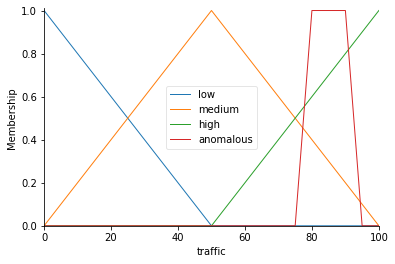

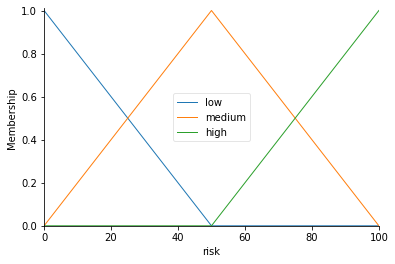

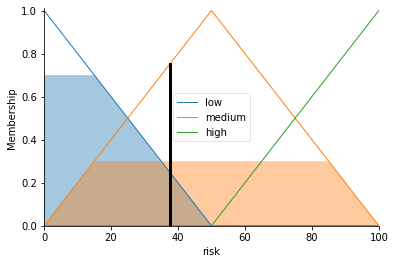

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent/Consequent objects hold universe variables and membership functions
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# Auto-membership function population is possible with .automf(3, 5, or 7)
traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 50])
traffic['medium'] = fuzz.trimf(traffic.universe, [0, 50, 100])
traffic['high'] = fuzz.trimf(traffic.universe, [50, 100, 100])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [0, 50, 100])
risk['high'] = fuzz.trimf(risk.universe, [50, 100, 100])

# Custom membership functions can be built interactively with a familiar, Pythonic API
traffic['anomalous'] = fuzz.trapmf(traffic.universe, [75, 80, 90, 95])

# You can see how these look with .view()
traffic.view()
risk.view()

# Rules
rule1 = ctrl.Rule(traffic['low'] & traffic['anomalous'], risk['high'])
rule2 = ctrl.Rule(traffic['medium'] & traffic['anomalous'], risk['medium'])
rule3 = ctrl.Rule(traffic['high'] & traffic['anomalous'], risk['low'])

# Control System Creation and Simulation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
risk_simulation.input['traffic'] = 85

# Crunch the numbers
risk_simulation.compute()

# Plotting
risk.view(sim=risk_simulation)
plt.show()


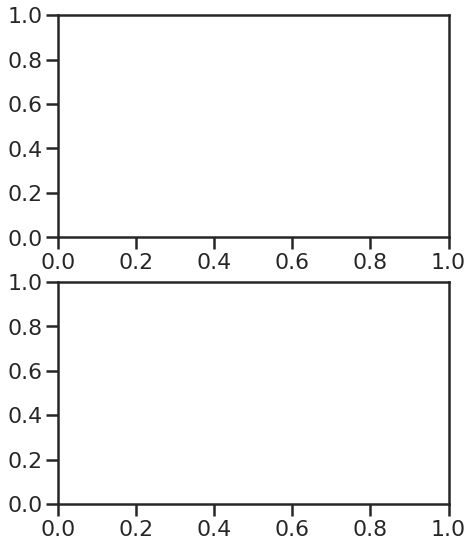

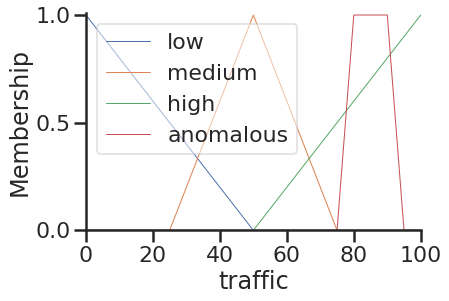

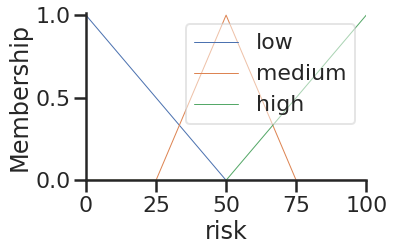

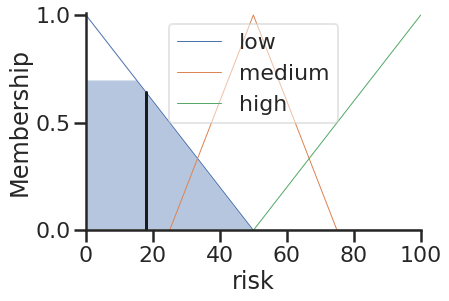

TypeError: ignored

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define universe variables and membership functions for traffic and risk levels
traffic = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 50])
traffic['medium'] = fuzz.trimf(traffic.universe, [25, 50, 75])
traffic['high'] = fuzz.trimf(traffic.universe, [50, 100, 100])

risk['low'] = fuzz.trimf(risk.universe, [0, 0, 50])
risk['medium'] = fuzz.trimf(risk.universe, [25, 50, 75])
risk['high'] = fuzz.trimf(risk.universe, [50, 100, 100])

# Define membership function for anomalous traffic
traffic['anomalous'] = fuzz.trapmf(traffic.universe, [75, 80, 90, 95])

# Plot membership functions for traffic and risk levels
sns.set(style="ticks", color_codes=True)
sns.set_context("poster")

fig, ax = plt.subplots(nrows=2, figsize=(7, 9))
traffic.view(ax=ax[0])
risk.view(ax=ax[1])
plt.tight_layout()

# Define the rules for determining risk level based on traffic levels
rule1 = ctrl.Rule(traffic['low'] & (traffic['anomalous']), risk['high'])
rule2 = ctrl.Rule(traffic['medium'] & (traffic['anomalous']), risk['medium'])
rule3 = ctrl.Rule(traffic['high'] & (traffic['anomalous']), risk['low'])

# Create the control system and simulation
risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

# Input the traffic level to the simulation
risk_simulation.input['traffic'] = 85

# Compute the risk level based on the traffic level
risk_simulation.compute()

# Plot the results of the simulation
risk.view(sim=risk_simulation)
plt.show()

# Print the results of the simulation
#print("Traffic level: ", risk_simulation.input['traffic'])
#print("Risk level: ", risk_simulation.output['risk'])

print("Traffic level: ", risk_simulation.input['traffic'])
print("Risk level: ", risk_simulation.output['risk'])



In [17]:
# Let's extend the code to perform real-time network traffic monitoring
import socket
import time

# Create a socket to listen for incoming traffic
server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server_socket.bind(('localhost', 12340))
server_socket.listen(5)

# Define the risk assessment function
def assess_risk(traffic_level):
    risk_simulation.input['traffic'] = traffic_level
    risk_simulation.compute()
    return risk_simulation.output

# Continuously listen for incoming traffic and assess the risk level
while True:
    client_socket, client_address = server_socket.accept()
    incoming_traffic = client_socket.recv(1024)
    traffic_level = int(incoming_traffic.decode().strip())
    risk_level = assess_risk(traffic_level)

    # Output the risk level to the console
    print("Incoming traffic: ", traffic_level)
    print("Risk level: ", risk_level)

    # Save the risk level and timestamp to a file for further analysis and visualization
    with open("risk_levels.txt", "a") as f:
        f.write("{},{}\n".format(time.time(), risk_level))

    client_socket.close()


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("risk_levels.txt", header=None, names=["timestamp", "risk_level"])
df.plot(x="timestamp", y="risk_level")
plt.show()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("risk_levels.txt", header=None, names=["timestamp", "risk_level"])
df.plot(x="timestamp", y="risk_level")
plt.show()
